In [42]:
import numpy as np
from scipy.optimize import minimize, LinearConstraint
from mpl_toolkits import mplot3d

%matplotlib inline
import matplotlib.pyplot as plt

In [70]:
N=100
M=0.41
F4_pos=1.5
N1_pos=1.5
b = [0.6672348, -0.0043487, 0.0002870, 1.3441301, 0.1358948, 0.1734694, -0.0027224, -0.0983954]
x=[N,M,F4_pos,N1_pos]

In [71]:
# define the function to minimize
def objective_function(x, b):

    obj=(b[0]-1)+(b[1]*np.log(x[0]*x[1]))+(b[2]*x[0])+(b[3]*x[1])+(b[4]*x[2])+(b[5]*x[3])+(b[6]*(x[0]*x[1]))+(b[7]*(x[2]*x[3]))
    
    return obj


In [79]:
res = minimize(

    objective_function,

    x0=[100,M,F4_pos,N1_pos],

    args=(b,),

    #constraints=constraint,
    
    bounds=[(100, 300), (M-((M*5)/100), M+((M*5)/100)), (F4_pos-((F4_pos*5)/100), F4_pos+((F4_pos*5)/100)),
            (N1_pos-((N1_pos*5)/100), N1_pos+((N1_pos*5)/100))],

)

In [82]:
F4_pos-((F4_pos*5)/100)

1.425

In [84]:
N1_pos-((N1_pos*5)/100)

1.425

In [80]:
res

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.17844937611809517
        x: [ 3.000e+02  3.895e-01  1.575e+00  1.425e+00]
      nit: 5
      jac: [-7.879e-04  5.162e-01 -4.319e-03  1.850e-02]
     nfev: 115
     njev: 23
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>

In [81]:
res.x

array([300.    ,   0.3895,   1.575 ,   1.425 ])

In [75]:
objective_function(res.x,b)

0.14902614699309516

In [86]:
#def f(x, y):
#    return np.sin(np.sqrt(x ** 2 + y ** 2))

#x = np.linspace(-6, 6, 30)
#y = np.linspace(-6, 6, 30)

X1=[100,M,np.linspace(F4_pos-((F4_pos*5)/100),F4_pos+((F4_pos*5)/100), 100),np.linspace(N1_pos-((N1_pos*5)/100),N1_pos+((N1_pos*5)/100), 100)]
X, Y = np.meshgrid(X1[2], X1[3])

Z = objective_function([100,M,X,Y], b)

Z
#Z = Z.reshape((len(X), len(Y)))

array([[0.36030036, 0.36029381, 0.36028727, ..., 0.35966565, 0.3596591 ,
        0.35965256],
       [0.36035074, 0.36034397, 0.36033721, ..., 0.35969412, 0.35968735,
        0.35968058],
       [0.36040113, 0.36039414, 0.36038714, ..., 0.3597226 , 0.3597156 ,
        0.35970861],
       ...,
       [0.36518797, 0.36515952, 0.36513107, ..., 0.36242791, 0.36239946,
        0.36237101],
       [0.36523836, 0.36520968, 0.365181  , ..., 0.36245639, 0.36242771,
        0.36239903],
       [0.36528875, 0.36525984, 0.36523094, ..., 0.36248487, 0.36245596,
        0.36242706]])

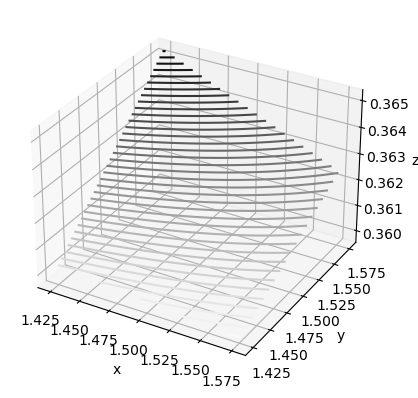

In [87]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

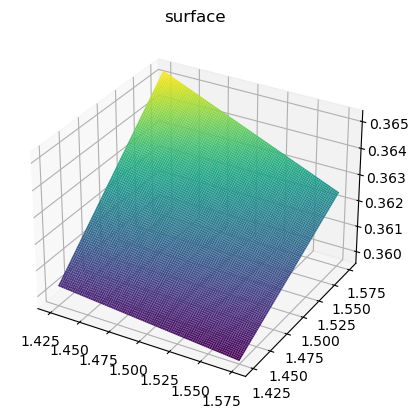

In [88]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');